In [239]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Dropout

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [240]:
outcomePath = '/Users/justinholmes/Desktop/Sports_Model/Data/outcomeData.csv'
featurePath = '/Users/justinholmes/Desktop/Sports_Model/Data/DifferentialFeatureData.csv'

In [241]:
outcomeData = pd.read_csv(outcomePath)
featureData = pd.read_csv(featurePath)

### Format all data

In [242]:
# drop unwanted columns
outcomeData = outcomeData.drop(["Start Time", "Box Score", "Notes"], axis=1)

In [243]:
# change OT to integer value for number of OT rounds
outcomeData.loc[(outcomeData["OT?"].isna()),'OT?']= 0
outcomeData.loc[(outcomeData["OT?"] == "OT"),'OT?']= 1
outcomeData.loc[(outcomeData["OT?"] == "2OT"),'OT?']= 2
outcomeData.loc[(outcomeData["OT?"] == "3OT"),'OT?']= 3
outcomeData.loc[(outcomeData["OT?"] == "4OT"),'OT?']= 4

In [244]:
def redefineTeamNames(dataframe):
    dataframe = dataframe.replace('Seattle SuperSonics', 'Oklahoma City Thunder', regex=True)
    
    dataframe = dataframe.replace('New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans', regex=True)

    dataframe = dataframe.replace('New Orleans Hornets', 'New Orleans Pelicans', regex=True)
    
    dataframe = dataframe.replace('Charlotte Bobcats', 'Charlotte Hornets', regex=True)
    
    dataframe = dataframe.replace('New Jersey Nets', 'Brooklyn Nets', regex=True)
    
    return dataframe

outcomeData = redefineTeamNames(outcomeData)

In [245]:
# outcomeData["Final Home Spread"] = (outcomeData["VisitorPTS"] - outcomeData["HomePTS"]).astype(float)

In [246]:
def homeWin(dataframe):
    if dataframe['Winner'] == dataframe['Home']:
        return True
    else:
        return False

outcomeData['HomeWin'] = outcomeData.apply(homeWin, axis=1)

In [247]:
outcomeData = pd.concat([outcomeData, featureData], axis=1, sort=False)

In [248]:
outcomeData.head()

,Year,Month,Visitor,VisitorPTS,Home,HomePTS,OT?,Attend,Total Points,Winner,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,2005,november,Houston Rockets,79,Detroit Pistons,87,0,22076,166,Detroit Pistons,...,-0.073,-0.015,-0.014,-0.2,4.9,0.005,0.002,0.6,-1.5,-0.038
1,2005,november,Sacramento Kings,98,Dallas Mavericks,107,0,20041,205,Dallas Mavericks,...,-0.010,0.004,-0.004,0.5,-0.2,0.047,-0.021,1.0,1.2,0.025
2,2005,november,Denver Nuggets,78,Los Angeles Lakers,89,0,18997,167,Los Angeles Lakers,...,0.131,0.000,0.002,-0.4,1.1,-0.016,0.011,-4.1,-0.6,-0.029
3,2005,november,Indiana Pacers,109,Cleveland Cavaliers,104,2,19730,213,Indiana Pacers,...,-0.120,-0.016,-0.006,-1.1,6.1,-0.039,0.013,0.5,0.2,-0.013
4,2005,november,Milwaukee Bucks,92,Orlando Magic,93,0,15138,185,Orlando Magic,...,-0.004,0.002,0.003,1.6,0.9,0.004,-0.015,0.8,-0.7,0.022


In [249]:
encoding = LabelEncoder()
encoding.fit(outcomeData['Home'].values)
outcomeData['Home'] = encoding.transform(outcomeData['Home'].values)
outcomeData['Visitor'] = encoding.transform(outcomeData['Visitor'].values)

In [250]:
outcomeData = outcomeData.drop(['Month', 'Attend', 'Winner', 'VisitorPTS', 'HomePTS', 'Total Points',
                 'G_OppPG', 'G_OppPP', 'MP_OppPP'], axis=1)


In [251]:
outcomeData.head()

,Year,Visitor,Home,OT?,HomeWin,FG_PG,FGA_PG,FG%_PG,3P_PG,3PA_PG,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,2005,10,8,0,True,0.1,0.0,0.001,-2.3,-5.7,...,-0.073,-0.015,-0.014,-0.2,4.9,0.005,0.002,0.6,-1.5,-0.038
1,2005,25,6,0,True,-1.8,-3.5,-0.002,-0.8,-1.5,...,-0.010,0.004,-0.004,0.5,-0.2,0.047,-0.021,1.0,1.2,0.025
2,2005,7,13,0,True,-1.7,0.1,-0.022,4.0,10.6,...,0.131,0.000,0.002,-0.4,1.1,-0.016,0.011,-4.1,-0.6,-0.029
3,2005,11,5,2,False,4.0,6.3,0.015,-2.9,-8.2,...,-0.120,-0.016,-0.006,-1.1,6.1,-0.039,0.013,0.5,0.2,-0.013
4,2005,16,21,0,True,0.9,1.3,0.004,-0.1,-0.1,...,-0.004,0.002,0.003,1.6,0.9,0.004,-0.015,0.8,-0.7,0.022


In [252]:
# X = pd.read_csv(featurePath)
# y = outcomeData["HomeWin"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [339]:
# train and test data based on specific years

trainData = outcomeData.loc[(outcomeData['Year'] < 2020) & (outcomeData['Year'] >= 2019)]
testData = outcomeData.loc[outcomeData['Year'] == 2020]

X_train = trainData.drop(["HomeWin", "Year", "OT?"], axis=1)
X_test = testData.drop(["HomeWin", "Year", "OT?"], axis=1)

y_train = trainData.pop('HomeWin')
y_test = testData.pop('HomeWin')

In [209]:
# train_stats = trainData.describe()

In [210]:
# train_stats = trainData.drop(["Final Home Spread"],axis=1).describe()

In [211]:
# train_stats.head()

In [212]:
# train_stats = train_stats.transpose()
# train_stats

In [213]:
# train_labels = trainData.pop('HomeWin')
# test_labels = testData.pop('HomeWin')

In [214]:
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']

In [116]:
# trainData.head()

In [117]:
# # regular_train_data = trainData[["Year", "Visitor", "Home", "OT?"]]
# normed_train_data = norm(trainData.drop(["Year", "Visitor", "Home", "OT?"],axis=1))
# # normed_train_data = pd.concat([regular_train_data, normed_train_data], axis=1, sort=False)

# # regular_test_data = testData[["Year", "Visitor", "Home", "OT?"]]
# normed_test_data = norm(testData.drop(["Year", "Visitor", "Home", "OT?"],axis=1))
# # normed_test_data = pd.concat([regular_test_data, normed_test_data], axis=1, sort=False)

In [118]:
# normed_train_data.head()

In [119]:
# normed_train_data = norm(trainData)

# normed_test_data = norm(testData)


In [120]:
# X = normed_train_data

# y = normed_test_data.to_numpy()


In [340]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dropout(.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1, activation='sigmoid')
  ])

#   optimizer = tf.keras.optimizers.RMSprop(0.001)


  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [122]:
# model = build_model()

In [60]:
# model.summary()

In [61]:
# test_labels[:10]

In [62]:
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result

In [63]:
# EPOCHS = 700

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[tfdocs.modeling.EpochDots()])

In [64]:
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result

In [65]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [66]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [67]:
# plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
# plt.ylabel('MAE [Home Spread]')

In [68]:
# plotter.plot({'Basic': history}, metric = "mse")
# plt.ylim([0, 100])
# plt.ylabel('MSE [Spread^2]')

In [69]:
# loss, accuracy = model.evaluate(normed_train_data, train_labels)
# print("Train Accuracy:", accuracy)

In [70]:
# loss, accuracy = model.evaluate(normed_test_data, test_labels)
# print("Test Accuracy:", accuracy)

### Model that stops based on improvement of MSE

In [341]:
validation_data = (X_test, y_test)

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

early_history = model.fit(X_train, y_train, 
                    epochs=200, validation_data = validation_data, verbose=0, batch_size=128, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.5312,  loss:3.5071,  val_accuracy:0.5757,  val_loss:3.8130,  
...........................

In [342]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Accuracy:", accuracy)

1312/1312 [==============================] - 0s 77us/sample - loss: 0.6388 - accuracy: 0.6928
Train Accuracy: 0.6928354


In [343]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

971/971 [==============================] - 0s 26us/sample - loss: 0.6540 - accuracy: 0.6447
Test Accuracy: 0.6446962


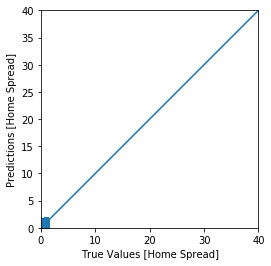

In [203]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Home Spread]')
plt.ylabel('Predictions [Home Spread]')
lims = [0, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

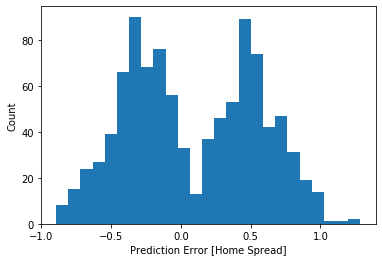

In [204]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Home Spread]")
_ = plt.ylabel("Count")

In [41]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=20)

In [42]:
# val_loss, val_acc = model.evaluate(X_test, y_test)
# print(val_loss, val_acc)